# INM433 Visual Analytics  - Credit Card  clustering

Mohsen Salimy

In [13]:
# Importing the necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [5]:
# Importing the dataset
df = pd.read_csv("CC GENERAL.csv")
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


The data has 8950 rows, thus` information about 8950 different credit card holders, and 18 different columns that represent different features.

# Data properties

The data has 8950 rows, thus` information about 8950 different credit card holders, and 18 different columns that represent different features.

In [8]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Some descriptive statistics about the data

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

From this table we can notice that the dataset consists of numerical values except the "CUST_ID" column which represents information about the id of the customer.

In [10]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

We can detect that two of the columns` CREDIT_LIMIT and MINIMUM_PAYMENT contain missing values, which need to substituded. We will use one of the common tactics in the machine learning, which is substituting the missing values with mean.

<AxesSubplot:>

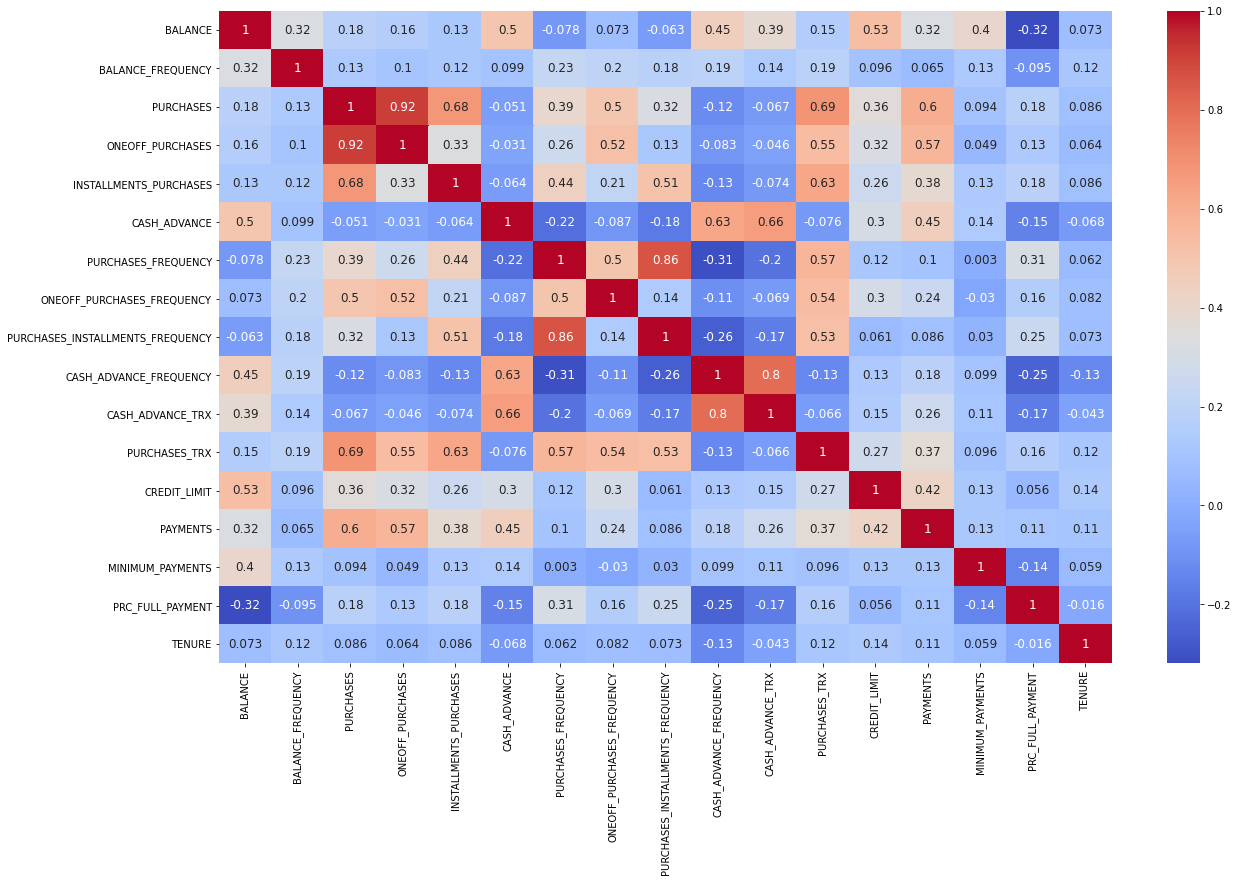

In [11]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", annot_kws={"fontsize":12})

We can notice that some variables are highly correlated between each other and we can later remove one from each pairt to reduce the number of the features.

# Data analysis

## Data preprocessing

### Filling in missing values

In [14]:
df.fillna(df.mean(), inplace=True)
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

Now all the missing values are substituded with the mean of the particluar column.

### Removing the "CUST_ID" column

In [15]:
# Creating an initial df to mathc the customer ID's with clusters later
df_initial = df.copy()
df.drop(["CUST_ID"], axis=1, inplace=True)
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


### Normalizing the dataset

In [16]:
scaled = MinMaxScaler().fit_transform(df)
df = pd.DataFrame(scaled, columns=df.columns)
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.002148,0.818182,0.001945,0.000000,0.004240,0.000000,0.166667,0.000000,0.083333,0.000000,0.00000,0.005587,0.031720,0.003979,0.001826,0.000000,1.0
1,0.168169,0.909091,0.000000,0.000000,0.000000,0.136685,0.000000,0.000000,0.000000,0.166667,0.03252,0.000000,0.232053,0.080893,0.014034,0.222222,1.0
2,0.131026,1.000000,0.015766,0.018968,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.033520,0.248748,0.012264,0.008210,0.000000,1.0
3,0.087521,0.636364,0.030567,0.036775,0.000000,0.004366,0.083333,0.083333,0.000000,0.055555,0.00813,0.002793,0.248748,0.000000,0.011310,0.000000,1.0
4,0.042940,1.000000,0.000326,0.000393,0.000000,0.000000,0.083333,0.083333,0.000000,0.000000,0.00000,0.002793,0.038397,0.013374,0.003204,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,0.001496,1.000000,0.005936,0.000000,0.012939,0.000000,1.000000,0.000000,0.833333,0.000000,0.00000,0.016760,0.031720,0.006419,0.000640,0.500000,0.0
8946,0.001007,1.000000,0.006118,0.000000,0.013333,0.000000,1.000000,0.000000,0.833333,0.000000,0.00000,0.016760,0.031720,0.005439,0.011310,0.000000,0.0
8947,0.001229,0.833333,0.002945,0.000000,0.006418,0.000000,0.833333,0.000000,0.666667,0.000000,0.00000,0.013966,0.031720,0.001602,0.001078,0.250000,0.0
8948,0.000707,0.833333,0.000000,0.000000,0.000000,0.000776,0.000000,0.000000,0.000000,0.111111,0.01626,0.000000,0.015025,0.001036,0.000729,0.250000,0.0


Now the data we have is completely normalised.

### Removing columns based on variance

In [17]:
df.var()

BALANCE                             0.011948
BALANCE_FREQUENCY                   0.056124
PURCHASES                           0.001898
ONEOFF_PURCHASES                    0.001658
INSTALLMENTS_PURCHASES              0.001615
CASH_ADVANCE                        0.001979
PURCHASES_FREQUENCY                 0.161098
ONEOFF_PURCHASES_FREQUENCY          0.089004
PURCHASES_INSTALLMENTS_FREQUENCY    0.157965
CASH_ADVANCE_FREQUENCY              0.017799
CASH_ADVANCE_TRX                    0.003079
PURCHASES_TRX                       0.004821
CREDIT_LIMIT                        0.014760
PAYMENTS                            0.003258
MINIMUM_PAYMENTS                    0.000930
PRC_FULL_PAYMENT                    0.085556
TENURE                              0.049754
dtype: float64

We define a threshold of variance 0.01 and will remove teh features that have lower variance than the threshold.

In [18]:
df.drop(["PURCHASES", "ONEOFF_PURCHASES", "INSTALLMENTS_PURCHASES", "CASH_ADVANCE", 
"CASH_ADVANCE_TRX", "PURCHASES_TRX", "PAYMENTS", "MINIMUM_PAYMENTS"], axis=1, inplace=True)
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CREDIT_LIMIT,PRC_FULL_PAYMENT,TENURE
0,0.002148,0.818182,0.166667,0.000000,0.083333,0.000000,0.031720,0.000000,1.0
1,0.168169,0.909091,0.000000,0.000000,0.000000,0.166667,0.232053,0.222222,1.0
2,0.131026,1.000000,1.000000,1.000000,0.000000,0.000000,0.248748,0.000000,1.0
3,0.087521,0.636364,0.083333,0.083333,0.000000,0.055555,0.248748,0.000000,1.0
4,0.042940,1.000000,0.083333,0.083333,0.000000,0.000000,0.038397,0.000000,1.0
...,...,...,...,...,...,...,...,...,...
8945,0.001496,1.000000,1.000000,0.000000,0.833333,0.000000,0.031720,0.500000,0.0
8946,0.001007,1.000000,1.000000,0.000000,0.833333,0.000000,0.031720,0.000000,0.0
8947,0.001229,0.833333,0.833333,0.000000,0.666667,0.000000,0.031720,0.250000,0.0
8948,0.000707,0.833333,0.000000,0.000000,0.000000,0.111111,0.015025,0.250000,0.0


We are left only with 9 columns after that step.

### Correlation matrix ov the kept variables.

<AxesSubplot:>

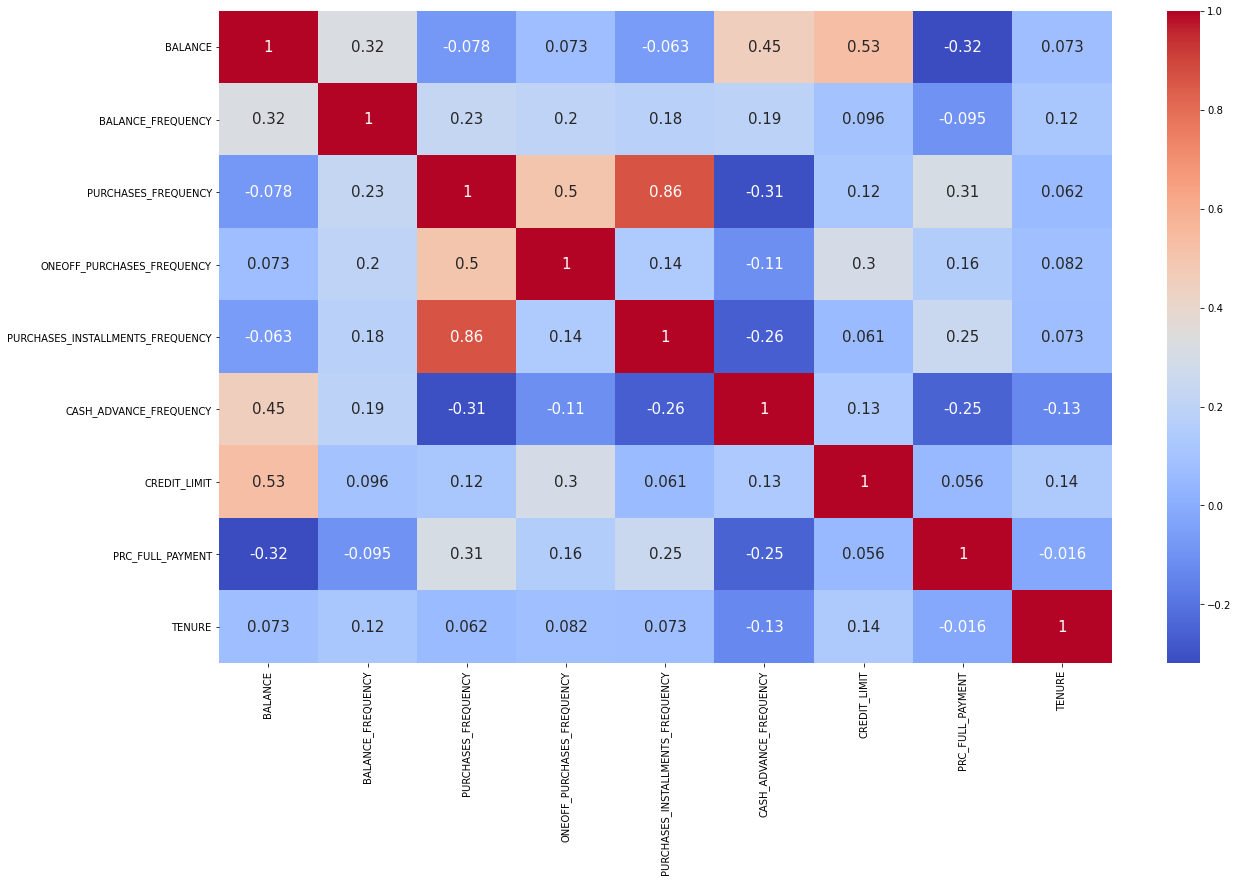

In [19]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", annot_kws={"fontsize":15})

We define the threshold as 0.5 and will remove one variable from the pairs that have higher correlation greater than that. We will remove "CREDIT_LIMIT" for the pair "BALANCE" - "CREDIT_LIMIT", and "PURCHASES_INSTALLMENTS_FREQUENCY" from the pair "PURCHASES_FREQUENCY" - "PURCHASES_INSTALLMENTS_FREQUENCY"

In [20]:
df.drop(["CREDIT_LIMIT", "PURCHASES_INSTALLMENTS_FREQUENCY"], axis=1, inplace=True)
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,PRC_FULL_PAYMENT,TENURE
0,0.002148,0.818182,0.166667,0.000000,0.000000,0.000000,1.0
1,0.168169,0.909091,0.000000,0.000000,0.166667,0.222222,1.0
2,0.131026,1.000000,1.000000,1.000000,0.000000,0.000000,1.0
3,0.087521,0.636364,0.083333,0.083333,0.055555,0.000000,1.0
4,0.042940,1.000000,0.083333,0.083333,0.000000,0.000000,1.0
...,...,...,...,...,...,...,...
8945,0.001496,1.000000,1.000000,0.000000,0.000000,0.500000,0.0
8946,0.001007,1.000000,1.000000,0.000000,0.000000,0.000000,0.0
8947,0.001229,0.833333,0.833333,0.000000,0.000000,0.250000,0.0
8948,0.000707,0.833333,0.000000,0.000000,0.111111,0.250000,0.0


Now we have 7 features left and preprocessing is finished. We can move on to PCA.

## PCA

In [21]:
# Transforming the data with the help of PCA to be able to visualise the clustering
pca = PCA()
data = pca.fit_transform(df)

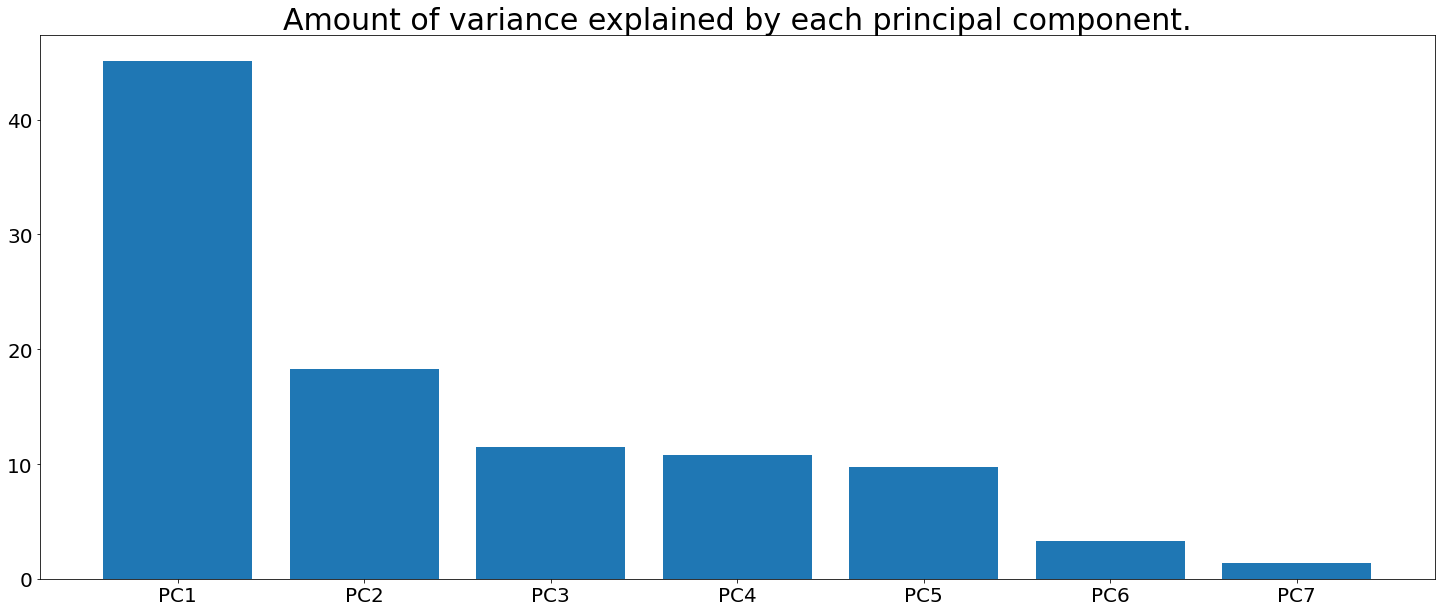

In [456]:
# Creating a scree plot of principal components
plt.figure(figsize=(25,10))
var = np.round(pca.explained_variance_ratio_*100, decimals = 1)
labels = ["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7"]
plt.bar(x=range(1,len(var)+1), height = var, tick_label = labels)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.title("Amount of variance explained by each principal component.", fontdict={"fontsize": 30})
plt.show()

We can see that PC1 and PC2 together explain more than 60% of the variance, so we can use those two components to create the model and visualise the data.

In [22]:
# Reducing the dimensionality of the data to 2 to be able to visualise the clustering
pca = PCA(2)
data = pca.fit_transform(df)

## K-Means

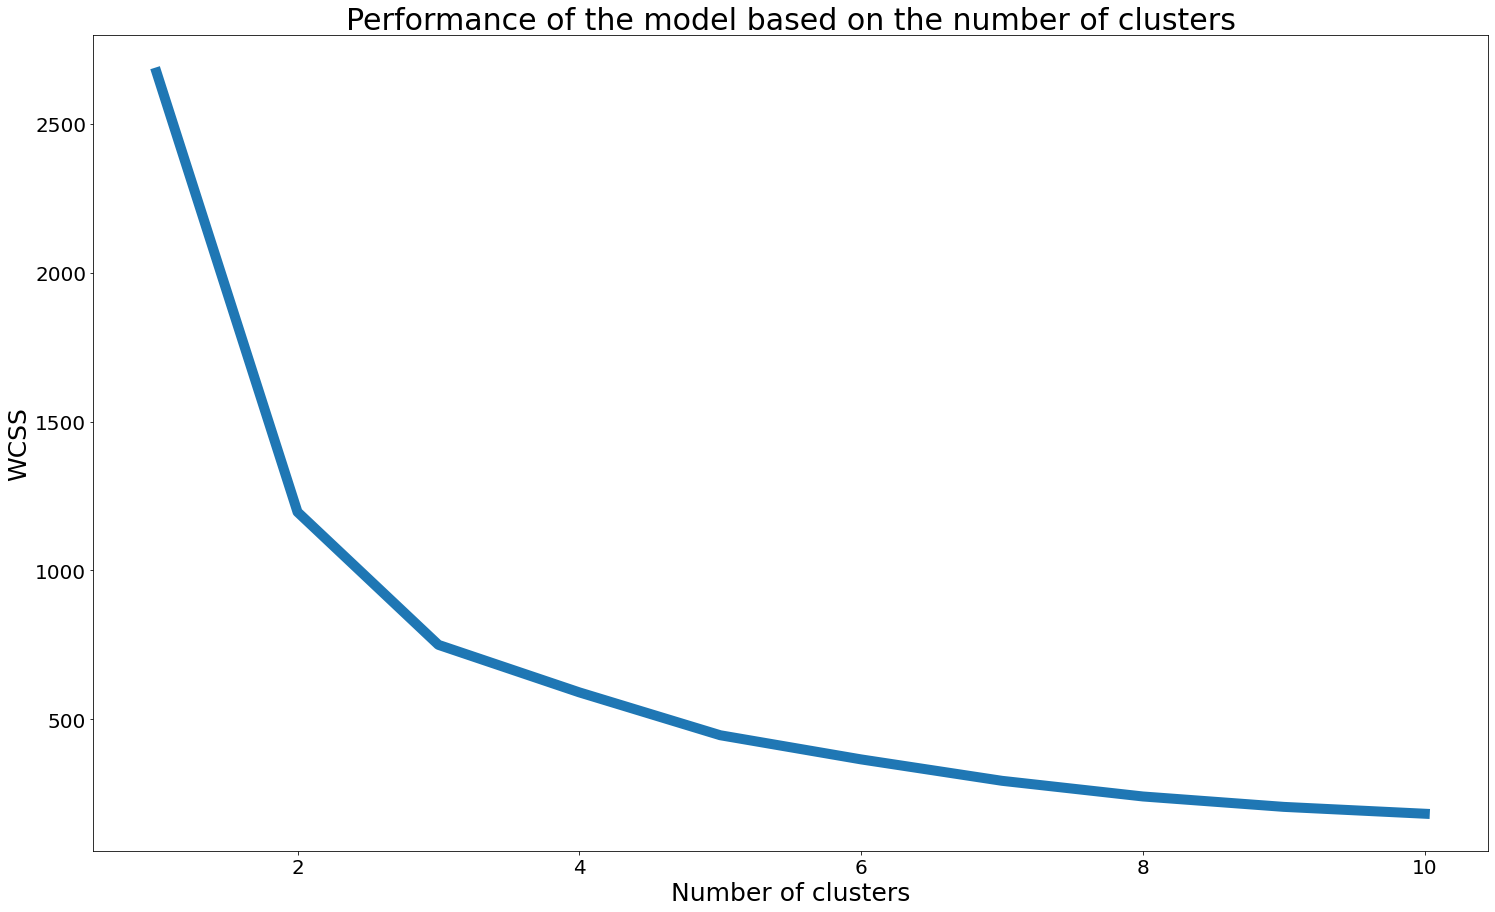

In [23]:
# Creating an elbow plot to check model performance based on the number of clusters
# WCSS - sum of squares of distances of datapoints
wcss = []  
for i in range(1,11):
   model = KMeans(n_clusters = i, init = "k-means++")
   model.fit(data)
   wcss.append(model.inertia_)
plt.figure(figsize=(25,15))
plt.plot(range(1,11), wcss, linewidth=10)
plt.title("Performance of the model based on the number of clusters", fontdict={"fontsize": 30})
plt.xlabel('Number of clusters', fontdict={"fontsize": 25})
plt.ylabel('WCSS', fontdict={"fontsize": 25})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

We can see that starting from k=5, the performance of the model startes to change very slowly, so we will choose 5 clusters for our model.

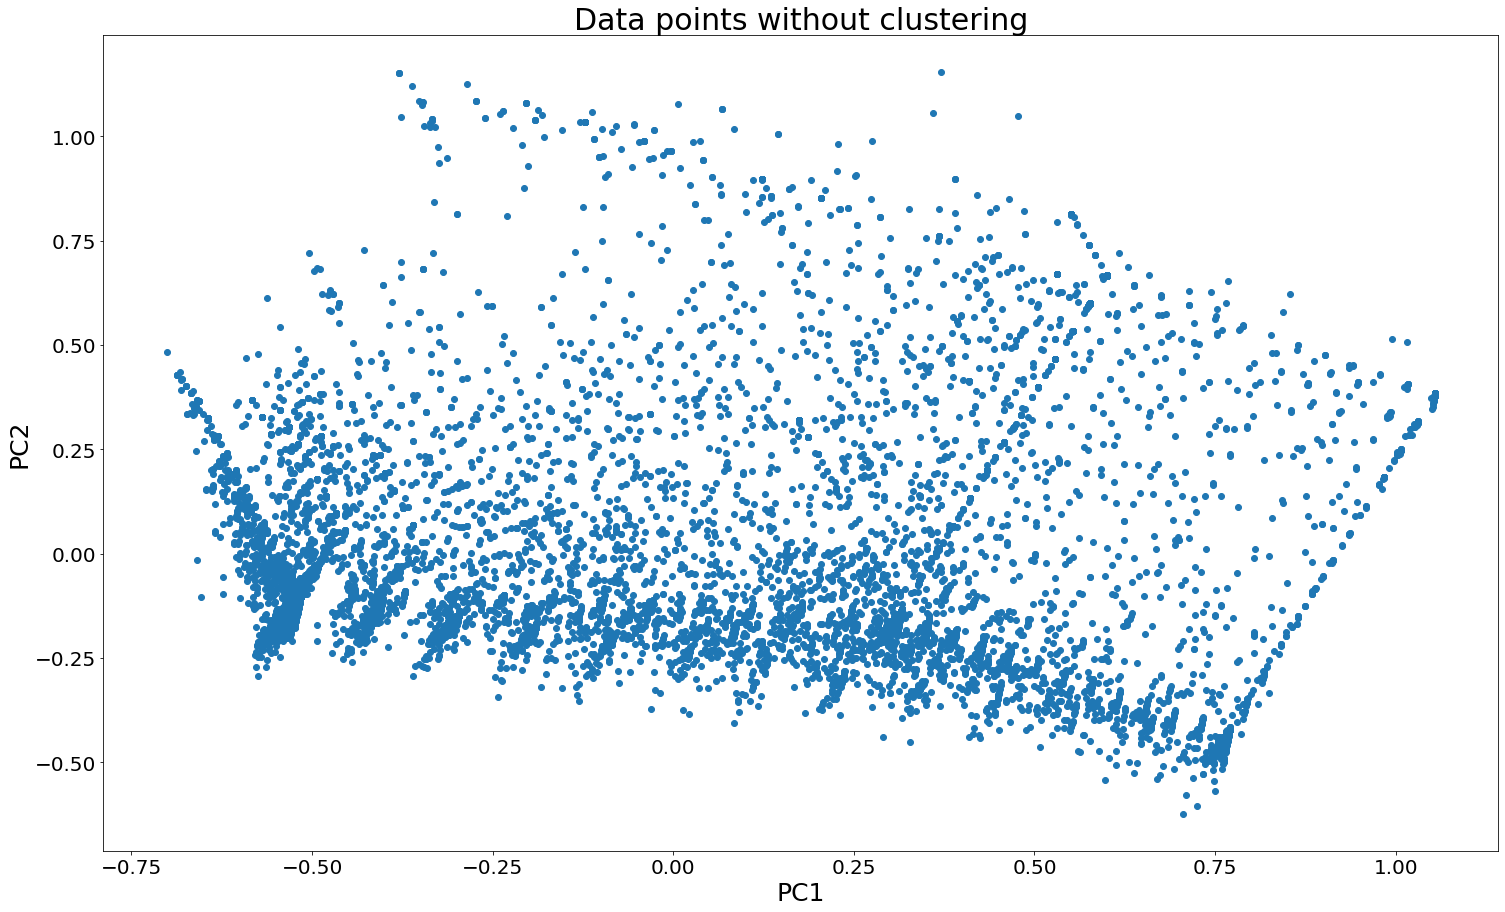

In [24]:
# Creating a model with one cluster to show the data points without clustering
model = KMeans(n_clusters=1, init = "k-means++")
clusters = model.fit_predict(data)
centers = np.array(model.cluster_centers_)

# Plotting data points
plt.figure(figsize=(25,15))
unique = np.unique(clusters)

for i in unique:
   plt.scatter(data[clusters == i , 0] , data[clusters == i , 1] , label = i)

plt.title("Data points without clustering", fontdict={"fontsize": 30})
plt.xlabel("PC1", fontdict={"fontsize": 25})
plt.ylabel("PC2", fontdict={"fontsize": 25})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

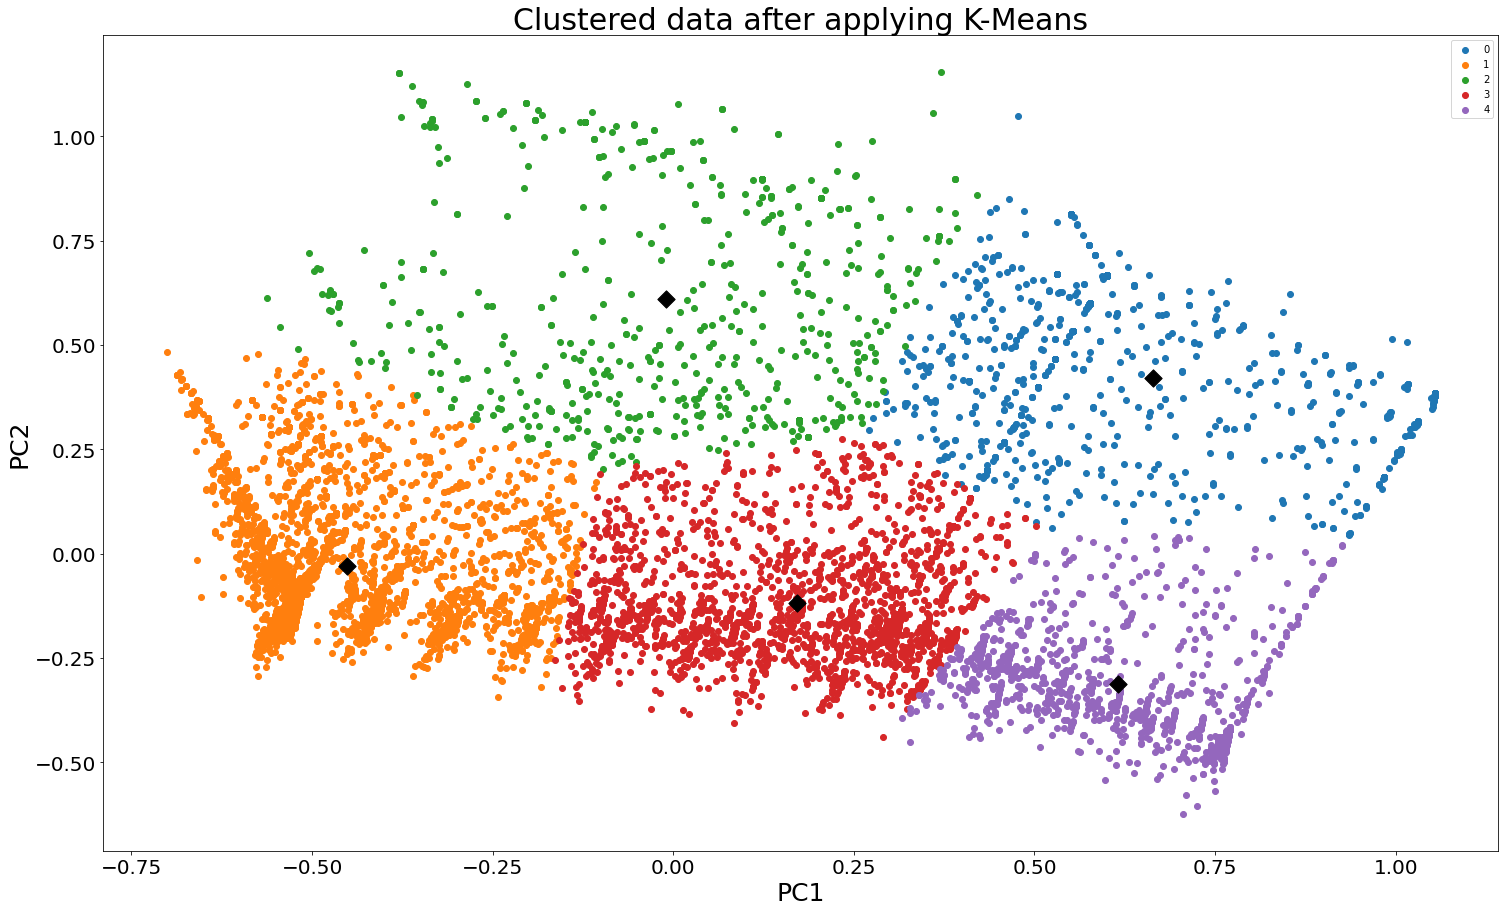

In [25]:
# Creating the final model, which will group customers into 5 clusters
final_model = KMeans(n_clusters=5, init = "k-means++")
clusters = final_model.fit_predict(data)
centers = np.array(final_model.cluster_centers_)

# Plotting data points
plt.figure(figsize=(25,15))
unique = np.unique(clusters)

for i in unique:
   plt.scatter(data[clusters == i , 0] , data[clusters == i , 1] , label = i)

# Plotting centroids
plt.scatter(centers[:,0], centers[:,1], marker="D", color='k', s=150)

plt.legend()
plt.title("Clustered data after applying K-Means", fontdict={"fontsize": 30})
plt.xlabel("PC1", fontdict={"fontsize": 25})
plt.ylabel("PC2", fontdict={"fontsize": 25})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

### Creating a final dataframe, which will contain information about the customer ID and the group they belong to.

In [27]:
final_df = pd.DataFrame(columns=["Customer_ID", "Cluster"])
final_df["Customer_ID"] = df_initial["CUST_ID"]
final_df["Cluster"] = clusters
final_df

,Customer_ID,Cluster
0,C10001,1
1,C10002,1
2,C10003,4
3,C10004,1
4,C10005,1
...,...,...
8945,C19186,0
8946,C19187,3
8947,C19188,2
8948,C19189,1
